<a href="https://colab.research.google.com/github/S-Prathyush/Machine-Learning-Models/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [6]:
# Define constants
base_dir = '/content/drive/MyDrive/flowers'
image_size = (150, 150)
batch_size = 32

In [7]:
# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [8]:

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3473 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


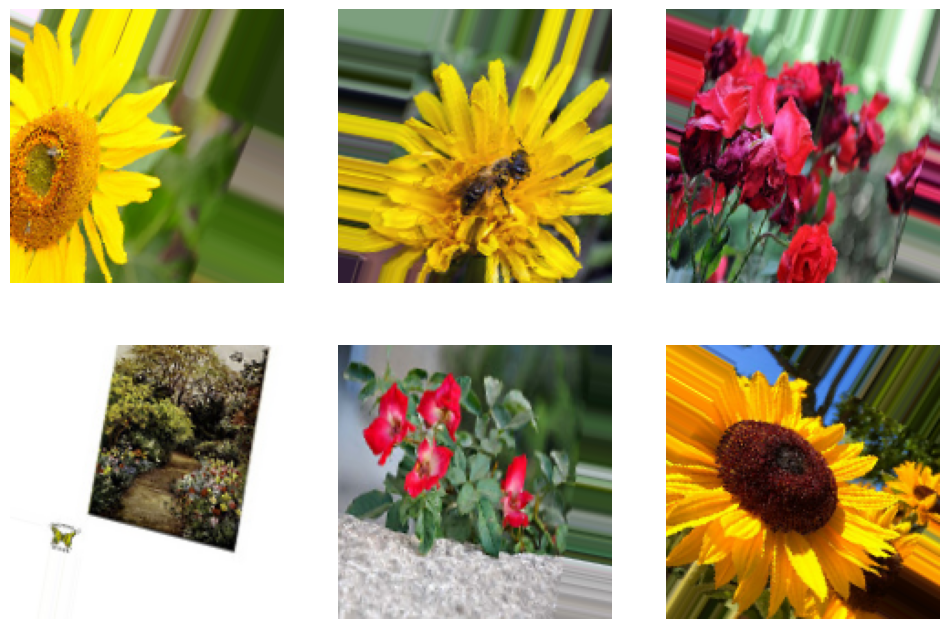

In [30]:
import matplotlib.pyplot as plt

# Get a batch of preprocessed images
sample_images, _ = next(train_generator)

# Plot the images
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

plt.show()


In [9]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
108/108 [==============================] - 1005s 9s/step - loss: 1.3101 - accuracy: 0.4170 - val_loss: 1.1554 - val_accuracy: 0.5174
Epoch 2/20
108/108 [==============================] - 214s 2s/step - loss: 1.0881 - accuracy: 0.5437 - val_loss: 1.0081 - val_accuracy: 0.5949
Epoch 3/20
108/108 [==============================] - 211s 2s/step - loss: 0.9745 - accuracy: 0.6088 - val_loss: 0.9678 - val_accuracy: 0.6273
Epoch 4/20
108/108 [==============================] - 217s 2s/step - loss: 0.9074 - accuracy: 0.6466 - val_loss: 0.8508 - val_accuracy: 0.6632
Epoch 5/20
108/108 [==============================] - 218s 2s/step - loss: 0.8528 - accuracy: 0.6553 - val_loss: 0.9383 - val_accuracy: 0.6505
Epoch 6/20
108/108 [==============================] - 212s 2s/step - loss: 0.8399 - accuracy: 0.6780 - val_loss: 0.8453 - val_accuracy: 0.6863
Epoch 7/20
108/108 [==============================] - 210s 2s/step - loss: 0.8150 - accuracy: 0.6888 - val_loss: 0.8717 - val_accuracy: 0.691

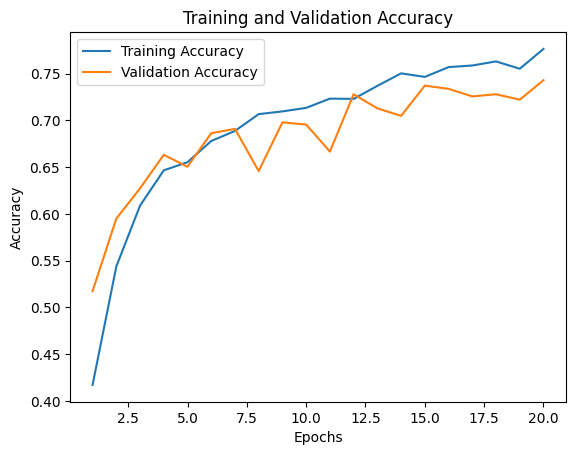

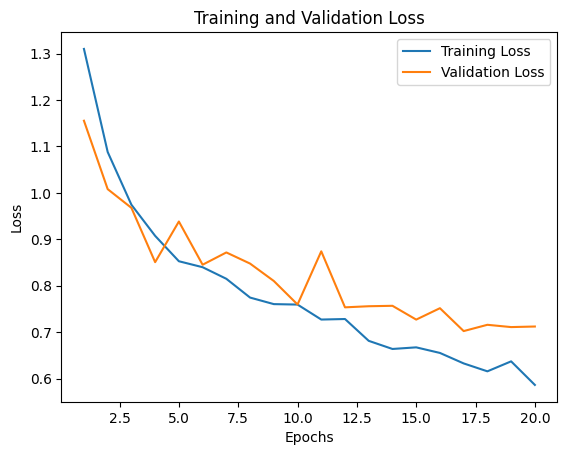

In [12]:
import matplotlib.pyplot as plt

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)

# Print the validation accuracy
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))


27/27 [==============================] - 20s 728ms/step - loss: 0.7215 - accuracy: 0.7500
Validation Accuracy: 75.00%


In [24]:
# Define the path where you want to save the model
model_save_path = 'flower_model.h5'

# Save the model
model.save(model_save_path)

print("Model saved successfully at:", model_save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: flower_model.h5


In [14]:
import numpy as np
from keras.preprocessing import image

# Define a function to predict the type of flower
def predict_flower(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values

    # Make prediction
    prediction = model.predict(img_array)

    # Get the label of the predicted class
    predicted_class = np.argmax(prediction)

    # Map the predicted class index to the flower labels
    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    # Get the predicted flower type
    predicted_flower = labels[predicted_class]

    return predicted_flower

# Provide the path to the JPG image you want to predict
image_path = '/content/1022552036_67d33d5bd8_n.jpg'

# Make a prediction
predicted_flower = predict_flower(image_path)
print("Predicted Flower:", predicted_flower)


1/1 [==============================] - 0s 288ms/step
Predicted Flower: sunflower


In [17]:
# Provide the path to the JPG image you want to predict
image_path = '/content/Dandelion.jpg'

# Make a prediction
predicted_flower = predict_flower(image_path)
print("Predicted Flower:", predicted_flower)


1/1 [==============================] - 0s 40ms/step
Predicted Flower: dandelion


In [19]:
# Provide the path to the JPG image you want to predict
image_path = '/content/bunch-of-roses.jpg'

# Make a prediction
predicted_flower = predict_flower(image_path)
print("Predicted Flower:", predicted_flower)


1/1 [==============================] - 0s 67ms/step
Predicted Flower: rose


In [22]:
# Provide the path to the JPG image you want to predict
image_path = '/content/360_F.jpg'

# Make a prediction
predicted_flower = predict_flower(image_path)
print("Predicted Flower:", predicted_flower)

1/1 [==============================] - 0s 32ms/step
Predicted Flower: tupil


In [23]:
# Provide the path to the JPG image you want to predict
image_path = '/content/hsha.jpg'

# Make a prediction
predicted_flower = predict_flower(image_path)
print("Predicted Flower:", predicted_flower)

1/1 [==============================] - 0s 81ms/step
Predicted Flower: daisy
